I.  Chargement et aperçu des données

In [1]:
import pandas as pd 

In [2]:
data = pd.read_excel('creditcard.xlsx')
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

II.   Analyse exploratoire
II.1. Informations générales 

In [19]:
# Dimensions du jeu de données
print(f'Dimensions: {data.shape}')

# Types de données
print(data.dtypes)

# Vérification des valeurs manquantes
print(f'Verification de NAN: {data.isnull().sum().sum()}')

Dimensions: (284807, 31)
Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
Verification de NAN: 0


II.2. Statistique descriptive

In [20]:
# Statistiques descriptives
print(data.describe())


                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

II.3. Distribution de la variable cible 

array([<Axes: xlabel='Class', ylabel='proportion'>], dtype=object)

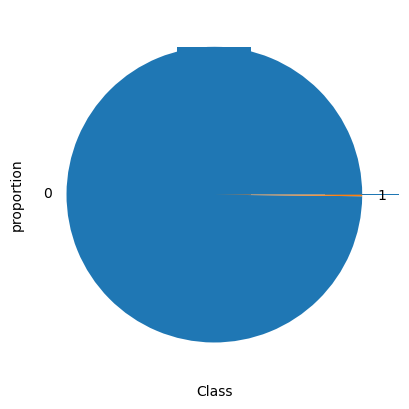

In [38]:
# Distribution de la variable cible
count= data['Class'].value_counts(normalize=True)

#Diagramme en barre verticale de la variabkle classe
#t = pd.crosstab(data.Class, 'freq')
t.plot.bar()
t.plot.pie(subplots = True, figsize=(3,3))


III    Visualisation des données

III.1. Histogramme

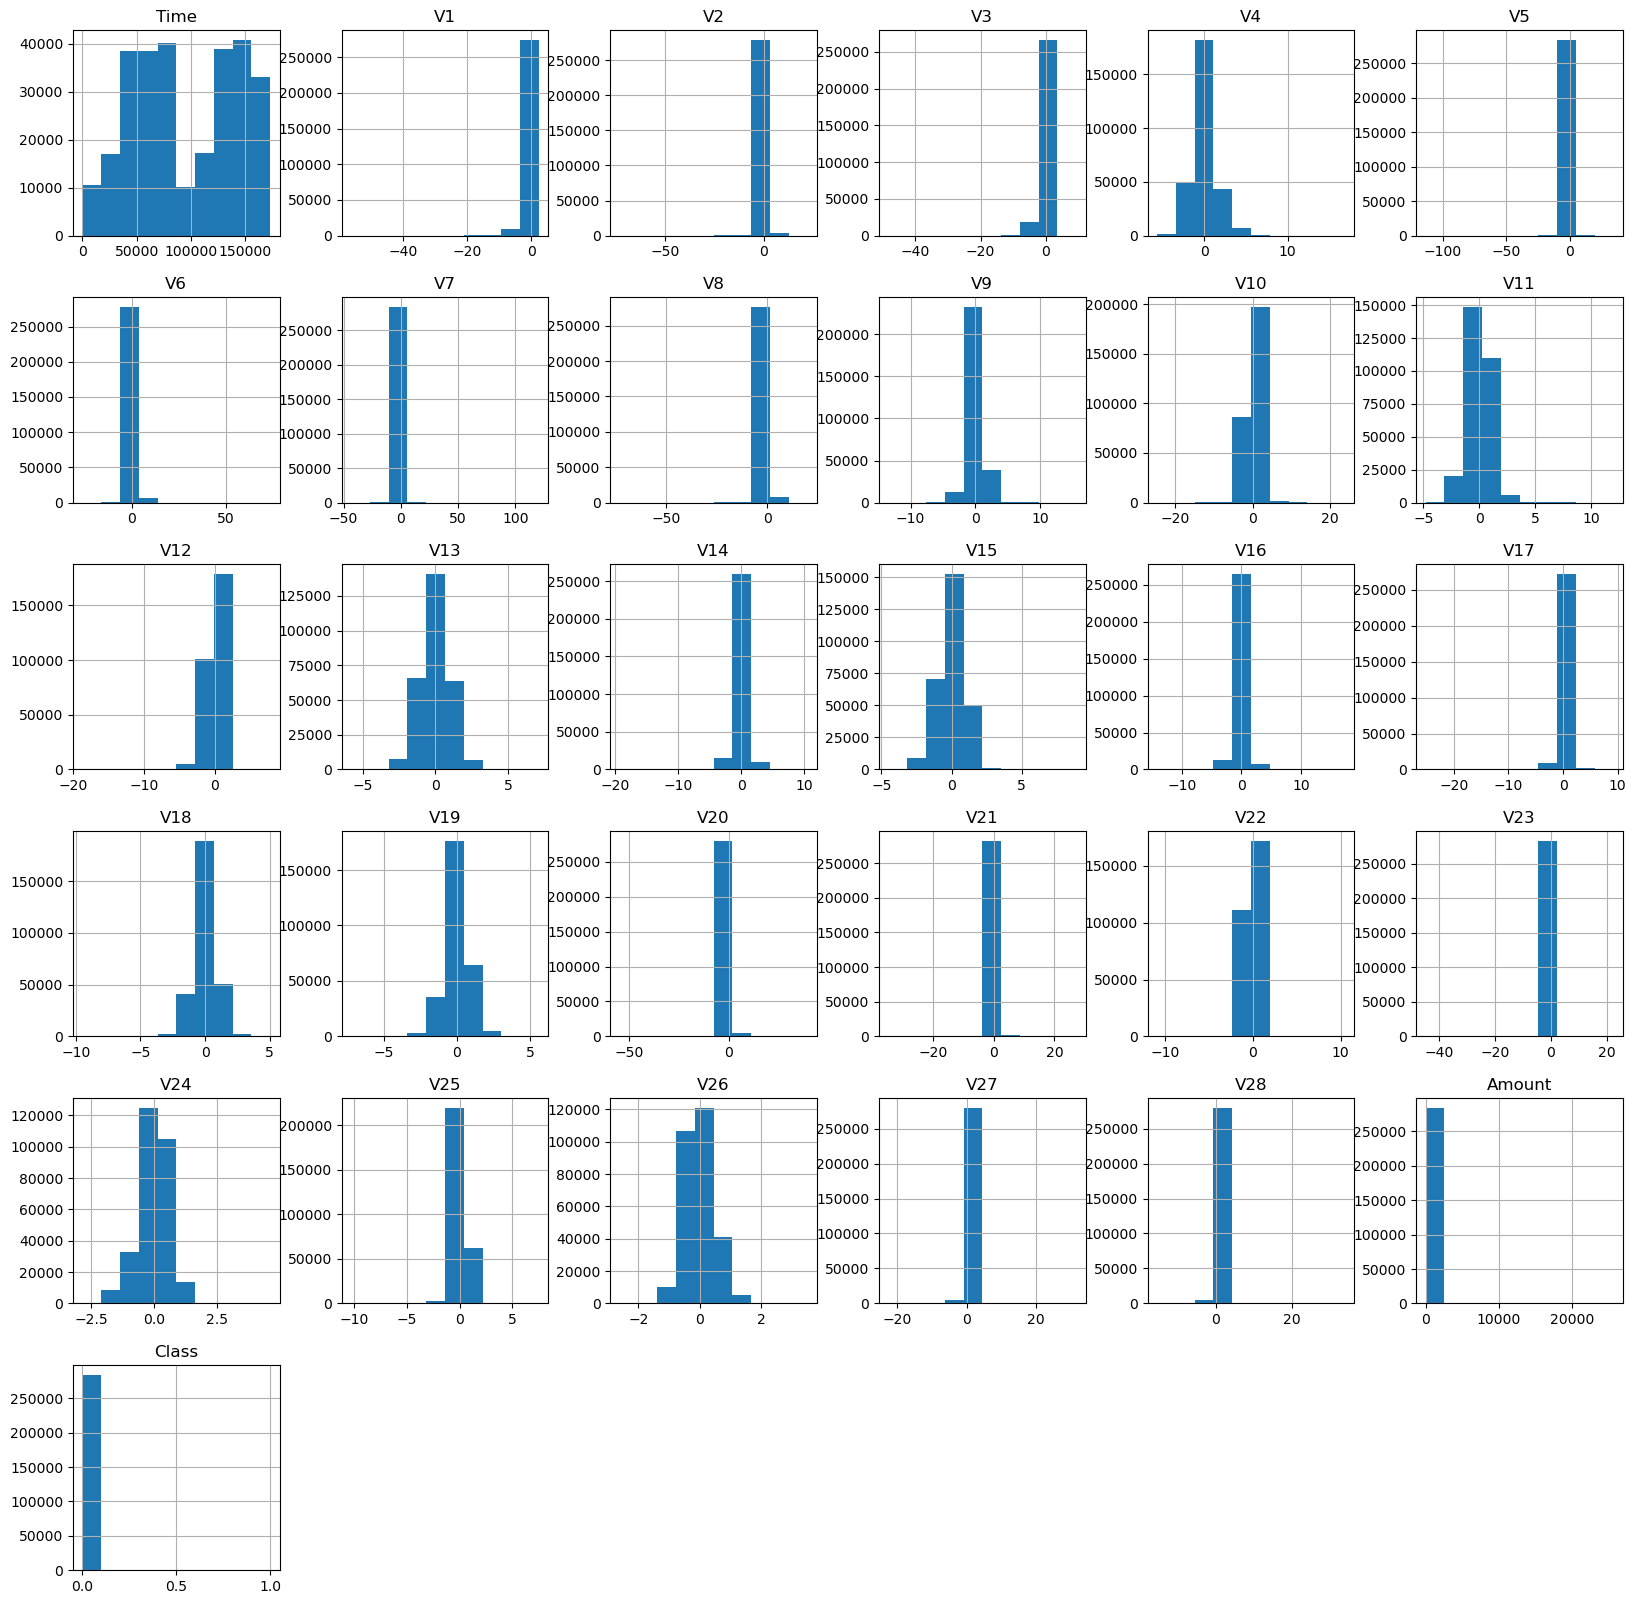

In [252]:
import matplotlib.pyplot as plt

# Histogrammes des variables
data.hist(figsize=(20, 20))
plt.savefig('C:/Users/seydi/Desktop/OneDrive/Εικόνες/Hist_data.png')

plt.show()


III.2.  Boxplot des variables numériques

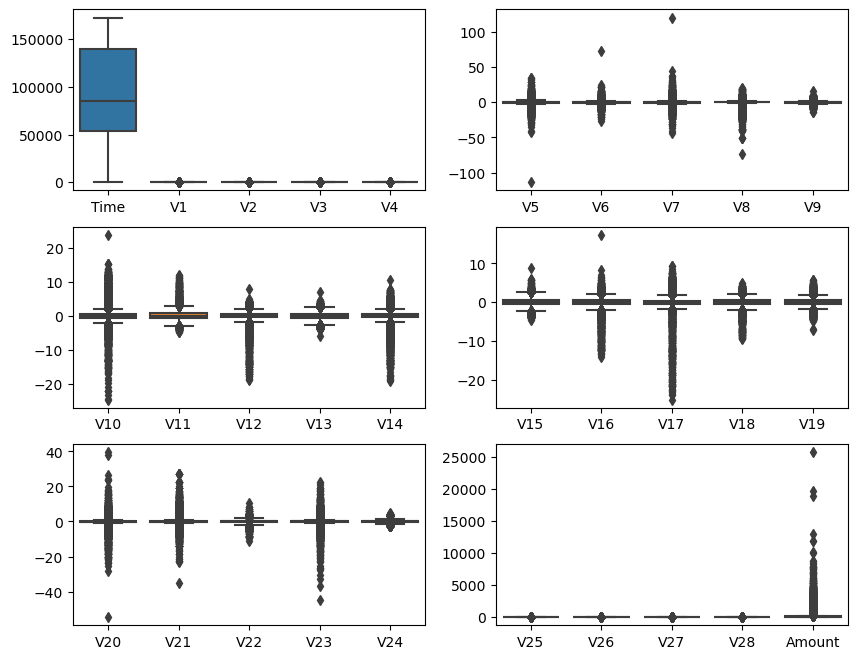

In [251]:
import seaborn as sns

# Boxplots des features
plt.figure(figsize = (10,8))
plt.subplot(3,2,1)
sns.boxplot(data.iloc[:, 0:5])
plt.subplot(3,2,2)
sns.boxplot(data.iloc[:, 5:10])
plt.subplot(3,2,3)
sns.boxplot(data.iloc[:, 10:15])
plt.subplot(3,2,4)
sns.boxplot(data.iloc[:, 15:20])
plt.subplot(3,2,5)
sns.boxplot(data.iloc[:, 20:25])
plt.subplot(3,2,6)
sns.boxplot(data.iloc[:, 25:30])

#plt.savefig('C:/Users/seydi/Desktop/OneDrive/Εικόνες/boxplot_data.png')
plt.show()

III.3. Matrice de Corrélation

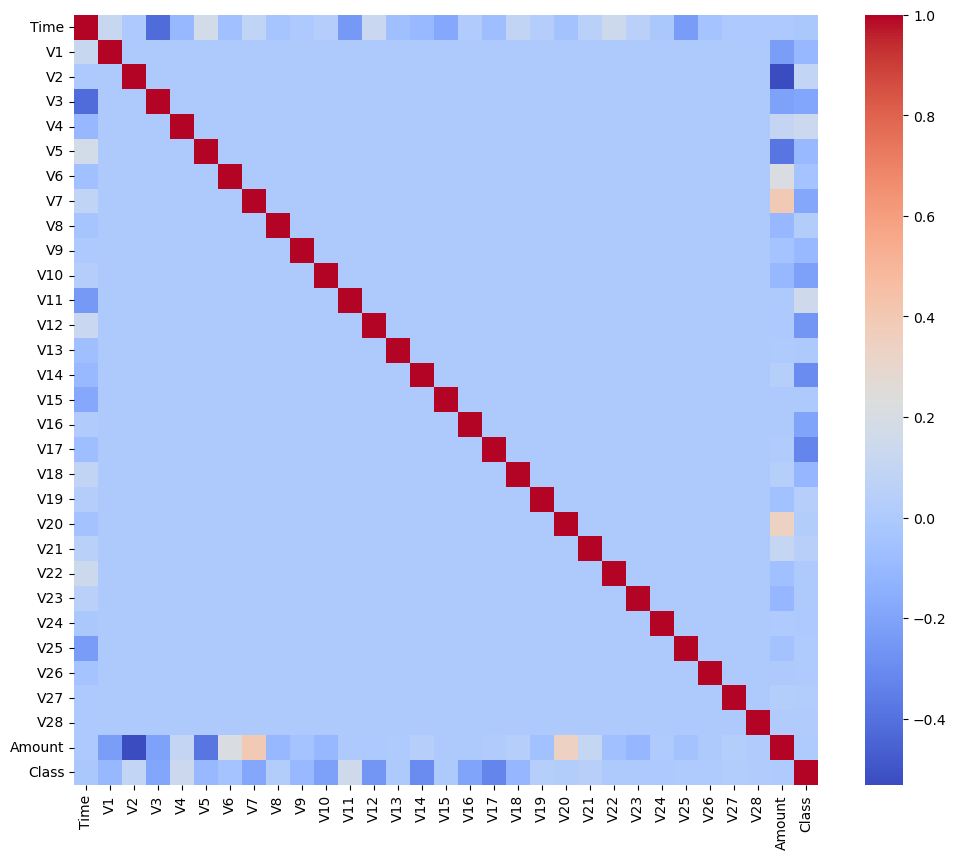

In [253]:
# Matrice de corrélation
corr_matrix = data.corr()

# Heatmap de la matrice de corrélation
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
#plt.savefig('C:/Users/seydi/Desktop/OneDrive/Εικόνες/cor_data.png')

plt.show()


IV    Analyse multivariée

IV.1  Sélection les meilleurs variables

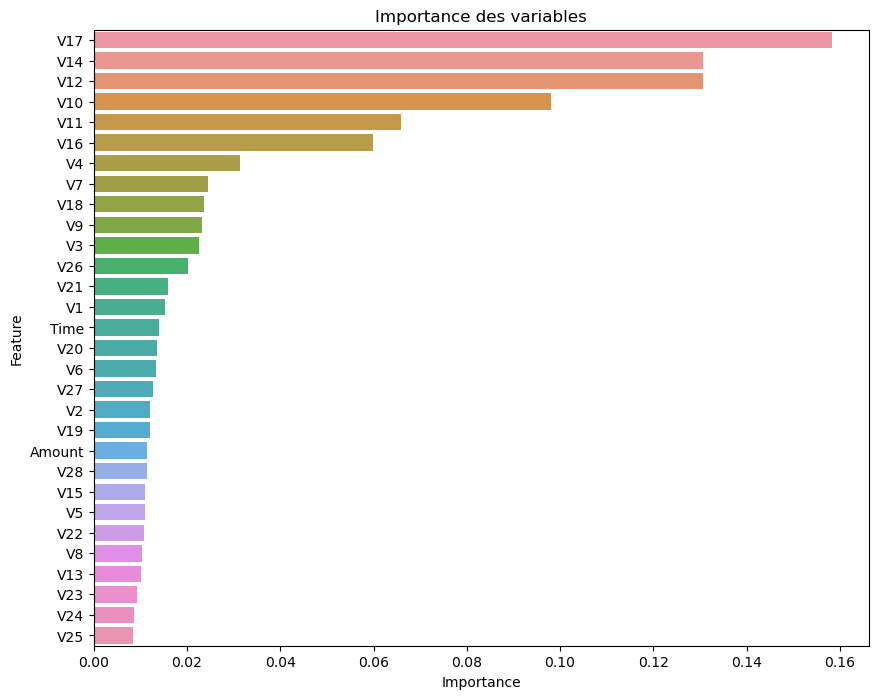

In [254]:
from sklearn.ensemble import RandomForestClassifier

# Modèle de forêt aléatoire
X = data.drop(columns=['Class'])
y = data['Class']

model = RandomForestClassifier()
model.fit(X, y)

# Importance des features
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Tri des features par importance décroissante
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
#print(feature_importance_df)

# Visualisation
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Importance des variables')


#plt.savefig('C:/Users/seydi/Desktop/OneDrive/Εικόνες/select_var.png')
plt.show()


V. Modélisation prédictive

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.59      0.75      0.66        84

    accuracy                           1.00     56962
   macro avg       0.80      0.87      0.83     56962
weighted avg       1.00      1.00      1.00     56962



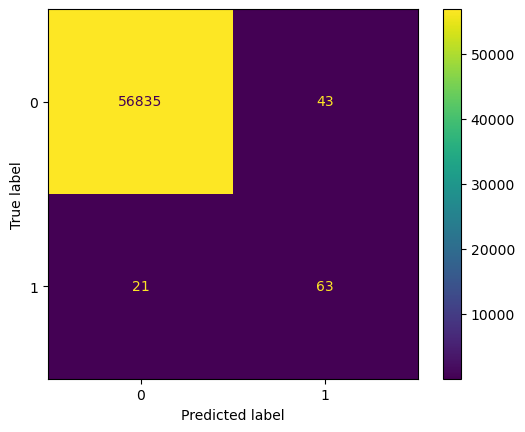

In [143]:
#confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
#plt.savefig('C:/Users/seydi/Desktop/OneDrive/Εικόνες/confusion_matrix.png')

predy = model.predict(X_test)
print(classification_report(y_test, predy))

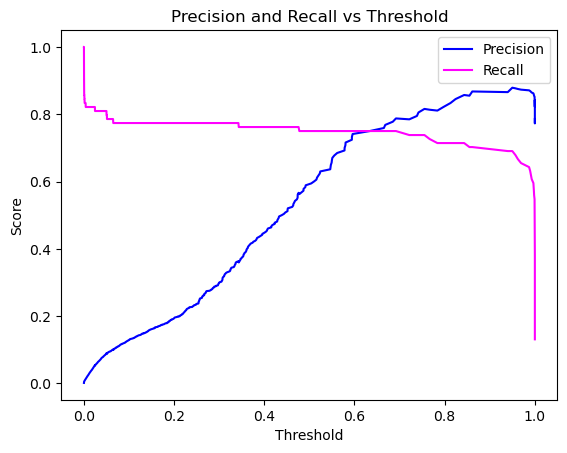

In [141]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score

# Calculer la courbe ROC
FPR, TPR, thresholds_roc = roc_curve(y_test, testy_predict_prob)

# Calculer la précision et le rappel pour chaque seuil
precision, recall, thresholds_pr = precision_recall_curve(y_test, testy_predict_prob)

# Calculer l'AUC (Area Under the Curve) pour la ROC
test_auc_roc = roc_auc_score(y_test, testy_predict_prob)

# Tracer la courbe ROC
#plt.figure(figsize=(12, 6))

# Première courbe: ROC Curve
#plt.subplot(1, 2, 1)
#plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')  # Ligne pour une prédiction aléatoire
#plt.plot(FPR, TPR, label='ROC curve (AUC = %0.2f)' % test_auc_roc)
#plt.xlabel('False Positive Rate (1 - Spécificité)')
#plt.ylabel('True Positive Rate (Sensibilité)')
#plt.title('ROC Curve for Fraud Detection Classification')
#plt.legend()

# Deuxième courbe: Precision et Recall en fonction du seuil
#plt.subplot(1, 2, 2)
plt.plot(thresholds_pr, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds_pr, recall[:-1], label='Recall', color='magenta')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()

plt.savefig('C:/Users/seydi/Desktop/OneDrive/Εικόνες/PR_Threshold_curve.png')
# Afficher les graphiques
#plt.tight_layout()
plt.show()


In [10]:
import numpy as np
from sklearn.metrics import roc_curve

# Supposons que y_test et y_prob soient déjà définis
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Fonction d'interpolation
def interpolate_fpr(thresholds, fpr, target_threshold):
    return np.interp(target_threshold, thresholds[::-1], fpr[::-1])

# Seuils souhaités
desired_thresholds = [0.02, 0.84]

# Calcul des FPR aux seuils désirés
for thresh in desired_thresholds:
    fpr_at_thresh = interpolate_fpr(thresholds, fpr, thresh)
    print(f"Seuil : {thresh:.2f} => Taux de faux positifs (FPR) : {fpr_at_thresh:.4f}")


Seuil : 0.02 => Taux de faux positifs (FPR) : 0.0269
Seuil : 0.84 => Taux de faux positifs (FPR) : 0.0002


In [21]:
import numpy as np
from sklearn.metrics import f1_score

# Supposons que y_test (valeurs réelles) et y_prob (probabilités prédites) soient déjà définis

# Seuils souhaités
seuils = [0.02, 0.84]

for seuil in seuils:
    # Binariser les prédictions en fonction du seuil
    y_pred = (y_prob >= seuil).astype(int)
    
    # Calculer le score F1
    f1 = f1_score(y_test, y_pred)
    
    print(f"Seuil : {seuil:.2f} => Score F1 : {f1:.4f}")


Seuil : 0.02 => Score F1 : 0.0856
Seuil : 0.84 => Score F1 : 0.7792


In [9]:
import numpy as np
from sklearn.metrics import precision_recall_curve

# Supposons que y_test et y_prob soient déjà définis
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Ajouter des seuils extrêmes pour correspondre aux dimensions de précision et rappel
thresholds = np.append(thresholds, 1)

# Fonction d'interpolation
def interpolate_precision_recall(thresholds, precision, recall, target_threshold):
    precision_at_threshold = np.interp(target_threshold, thresholds, precision)
    recall_at_threshold = np.interp(target_threshold, thresholds, recall)
    return precision_at_threshold, recall_at_threshold

# Seuils souhaités
desired_thresholds = [0.02, 0.84]

# Calcul des précisions et rappels aux seuils désirés
for thresh in desired_thresholds:
    prec, rec = interpolate_precision_recall(thresholds, precision, recall, thresh)
    print(f"Seuil : {thresh:.2f} => Précision : {prec:.4f}, Rappel : {rec:.4f}")


Seuil : 0.02 => Précision : 0.0451, Rappel : 0.8214
Seuil : 0.84 => Précision : 0.8551, Rappel : 0.7143


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_recall_curve, auc

# Modèle de forêt aléatoire
X = data.drop(columns=['Class'])
y = data['Class']


In [22]:
l1=['precision', 'recall' , 'fpr', 'F1_score']
l2 = [ 0.0451, 0.8214 , 0.0269, 0.0856]
l3 = [ 0.8551, 0.7143 , 0.0002, 0.7792]
bib = {
    'Metrique': l1,
    'Threshold=0.02': l2,
    'Threshold=0.84': l3
}

pd.DataFrame(bib)

,Metrique,Threshold=0.02,Threshold=0.84
0,precision,0.0451,0.8551
1,recall,0.8214,0.7143
2,fpr,0.0269,0.0002
3,F1_score,0.0856,0.7792


C:\Users\seydi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


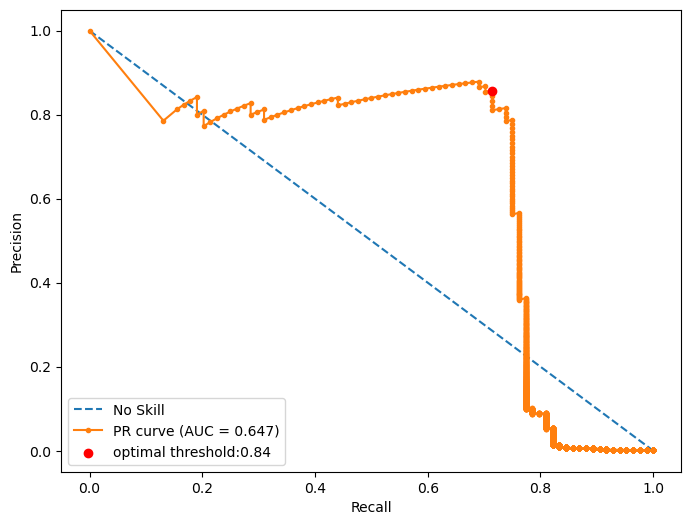

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Entraînement du modèle
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Rapport de classification
#print(classification_report(y_test, y_pred))

# Courbe Precision-Recall
precisions, recalls, thresholds2 = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recalls, precisions)

# Calcul de la moyenne harmonique F1-score
F1_score = 2*(recalls * precisions)/(recalls + precisions)

# Calculer la somme de precision et recall pour chaque seuil
optimal_idx2 = F1_score.argmax() # Trouver l'index du seuil optimal
optimal_threshold2 = thresholds2[optimal_idx2] # Le meilleur seuil
optimal_precision = precisions[optimal_idx2] # Sensibilité au meilleur seuil
optimal_recall = recalls[optimal_idx2] # Sensibilité au meilleur seuil

# Visualisation de la courbe Precision-Recall
plt.figure(figsize=(8, 6))
#plt.plot(recall, precision, marker='--')
plt.plot([0, 1], [1, 0], linestyle='--', label='No Skill') # Tracer le modele sans competence
plt.plot(recalls, precisions, marker='.', label='PR curve (AUC = %.3f)' % pr_auc) # Tracer PR-Curve de la regression logistique

# Ajouter un point optimal 
plt.scatter(optimal_recall, optimal_precision, color='red', label = f'optimal threshold:{optimal_threshold2:.2f}', zorder=5)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.savefig('C:/Users/seydi/Desktop/OneDrive/Εικόνες/PR_Curve.png')

plt.show()


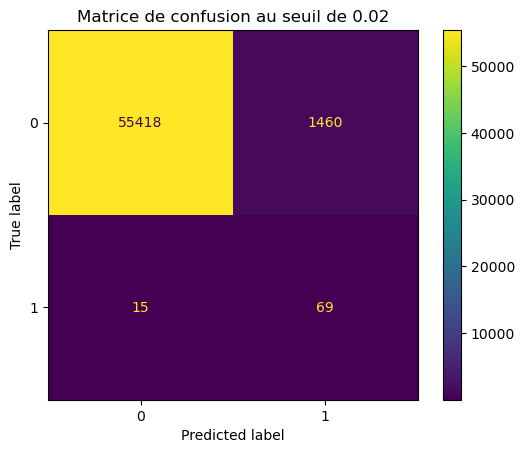

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Supposons que 'model' soit votre modèle entraîné et 'X_test' vos données de test
# 'y_test' contient les vraies étiquettes des classes

# Étape 1 : Obtenez les probabilités prédites pour la classe positive
y_prob = model.predict_proba(X_test)[:, 1]

# Étape 2 : Appliquez le seuil de 0,84 pour obtenir les prédictions binaires
seuil = 0.02
y_pred = (y_prob >= seuil).astype(int)

# Étape 3 : Calculez la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Étape 4 : Affichez la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='viridis')  # Vous pouvez choisir une autre colormap si vous le souhaitez
plt.title(f'Matrice de confusion au seuil de {seuil}')
plt.savefig('C:/Users/seydi/Desktop/OneDrive/Εικόνες/confusion_matrix_0.02.png')


plt.show()



In [24]:
60/(60+24)

0.7142857142857143

VI.  Evaluation du modele

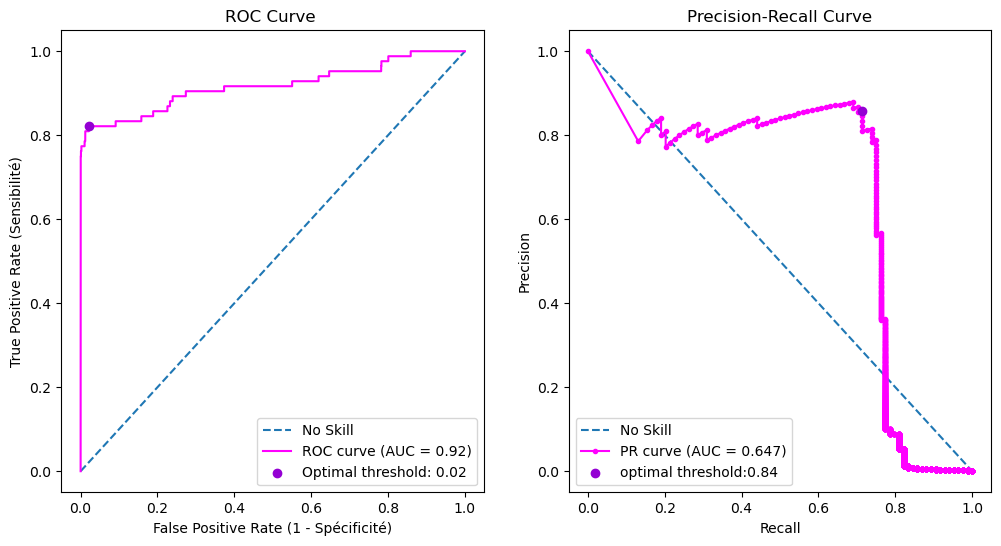

In [140]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve

# Probabilité predite
testy_predict_prob = model.predict_proba(X_test)[:,1]

# Calculer la courbe ROC
FPR, TPR, thresholds1 = roc_curve(y_test, testy_predict_prob)

# Calculer la courbe de precision recall
precisions, recalls, thresholds2 = precision_recall_curve(y_test, testy_predict_prob)

# Calculer l'AUC (Area Under the Curve) de ROC
test_auc_roc = roc_auc_score(y_test, testy_predict_prob)

# Calculer l'AUC de precision-recall (pr)
test_auc_pr = auc(recalls, precisions )

# Calcul de la moyenne harmonique F1-score
F1_score = 2*(recalls * precisions)/(recalls + precisions)

# Calculer la somme de TPR et (1 - FPR) pour chaque seuil
optimal_idx1 = np.argmax(TPR - FPR)  # Trouver l'index du seuil optimal
optimal_threshold1 = thresholds1[optimal_idx1]  # Le meilleur seuil est 0.024
optimal_tpr = TPR[optimal_idx1]  # Sensibilité au meilleur seuil = 0.821
optimal_fpr = FPR[optimal_idx1]  # Spécificité au meilleur seuil = 0.021

# Calculer la somme de precision et recall pour chaque seuil
optimal_idx2 = F1_score.argmax() # Trouver l'index du seuil optimal
optimal_threshold2 = thresholds2[optimal_idx2] # Le meilleur seuil
optimal_precision = precisions[optimal_idx2] # Sensibilité au meilleur seuil
optimal_recall = recalls[optimal_idx2] # Sensibilité au meilleur seuil

# Tracer la courbe ROC
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')  # Ligne pour une prédiction aléatoire
plt.plot(FPR, TPR, color = 'magenta', label='ROC curve (AUC = %0.2f)' % test_auc_roc)  # Ajouter la courbe ROC

# Ajouter un point pour le meilleur seuil
plt.scatter(optimal_fpr, optimal_tpr, color='darkviolet', label=f'Optimal threshold: {optimal_threshold1:.2f}', zorder=5)

# Ajouter les labels, titre et légende
plt.xlabel('False Positive Rate (1 - Spécificité)')
plt.ylabel('True Positive Rate (Sensibilité)')
plt.title('ROC Curve ')
plt.legend()

# Tracer la courbe precision recall
plt.subplot(1,2,2)
plt.plot([0, 1], [1, 0], linestyle='--', label='No Skill') # Tracer le modele sans competence
plt.plot(recalls, precisions, color = 'magenta', marker='.', label='PR curve (AUC = %.3f)' % test_auc_pr) # Tracer PR-Curve de la regression logistique

# Ajouter un point optimal 
plt.scatter(optimal_recall, optimal_precision, color='darkviolet', label = f'optimal threshold:{optimal_threshold2:.2f}', zorder=5)

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
# show the legend
plt.legend()


# Optionnel : Sauvegarder l'image des courbes ROC et PR
#plt.savefig('C:/Users/seydi/Desktop/OneDrive/Εικόνες/roc_pr_curve.png')

# Afficher la courbe
plt.show()


In [245]:
import pandas as pd
import numpy as np

dat = {
    'True Value': y_test,
    'Predicted Probability': testy_predict_prob
}
df = pd.DataFrame(dat)
df=df.sort_values(by='Predicted Probability', ascending = False)

thresholds_list = [6e-30 , 0.4, 0.6, 0.8, 0.84]

 # Prédiction binaire pour chaque seuil (1 si probabilité >= seuil, sinon 0)
for threshold in thresholds_list:
    column_name = f'S= {threshold}'
    df[column_name] = np.where(df['Predicted Probability'] >= threshold, 1, 0)

df
# Si nécessaire, vous pouvez enregistrer ce DataFrame dans un fichier CSV
#df.to_csv('predictions_df.csv', index=False)

,True Value,Predicted Probability,S= 6e-30,S= 0.4,S= 0.6,S= 0.8,S= 0.84
10620,0,1.000000e+00,1,1,1,1,1
150601,1,1.000000e+00,1,1,1,1,1
9509,1,1.000000e+00,1,1,1,1,1
12156,0,1.000000e+00,1,1,1,1,1
42635,1,1.000000e+00,1,1,1,1,1
...,...,...,...,...,...,...,...
228525,0,5.948530e-27,1,0,0,0,0
91896,0,4.454920e-27,1,0,0,0,0
238412,0,3.773454e-27,1,0,0,0,0
240739,0,5.513707e-30,0,0,0,0,0
